In [ ]:
# Importy
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
from google.colab import drive
import tarfile
import os


In [ ]:
#Połącz z dyskiem i wypakuj dane treningowe P2
drive.mount('/content/drive')
tar = tarfile.open("drive/MyDrive/kopia_Test.tar.xz")
tar.extractall("kopiaTest")

Mounted at /content/drive


In [ ]:
# P2
# Ścieżka dostępu do danych treningowych i podział 80/20
train_data_dir = '/content/kopiaTest'

batch_size = 64
image_size = (224, 224)

train_datagen = ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

validation_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [ ]:
# Zbiór treningowy P2
train_generator = validation_datagen.flow_from_directory(
    train_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)


Found 750 images belonging to 2 classes.


In [ ]:
# Zbiór walidacyjny P2
validation_generator = validation_datagen.flow_from_directory(
    train_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 186 images belonging to 2 classes.


In [ ]:
# Definicja modelu P2
model = Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_accuracy')

In [ ]:
# Trening P2
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=30
)

model.save("p2.keras")

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


11/11 ━━━━━━━━━━━━━━━━━━━━ 95s 8s/step - accuracy: 0.7100 - loss: 0.7417 - val_accuracy: 0.9531 - val_loss: 0.1151
Epoch 2/10
 1/11 ━━━━━━━━━━━━━━━━━━━━ 1:04 6s/step - accuracy: 0.9688 - loss: 0.2008

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


11/11 ━━━━━━━━━━━━━━━━━━━━ 15s 834ms/step - accuracy: 0.9688 - loss: 0.2008 - val_accuracy: 0.9828 - val_loss: 0.0513
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 123s 8s/step - accuracy: 0.9495 - loss: 0.1455 - val_accuracy: 0.8281 - val_loss: 0.4265
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 258ms/step - accuracy: 0.9783 - loss: 0.0573 - val_accuracy: 0.9655 - val_loss: 0.1603
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 87s 8s/step - accuracy: 0.9696 - loss: 0.0863 - val_accuracy: 0.9844 - val_loss: 0.0673
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 11s 173ms/step - accuracy: 0.9531 - loss: 0.0567 - val_accuracy: 0.9828 - val_loss: 0.0418
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 87s 8s/step - accuracy: 0.9636 - loss: 0.0834 - val_accuracy: 0.9766 - val_loss: 0.0610
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 154ms/step - accuracy: 0.9688 - loss: 0.0940 - val_accuracy: 1.0000 - val_loss: 0.0314
Epoch 9/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 149s 9s/step - accuracy: 0.9777 - loss: 0.0548 - val_accuracy: 0.9766 - val_los

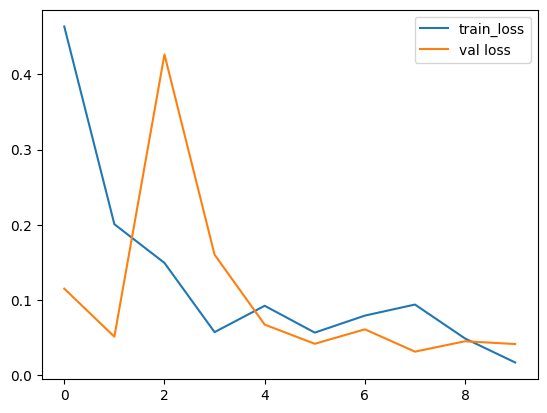

In [ ]:
# Wykres strat P2

plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['val_loss'], label ='val loss')
plt.legend()
plt.show()

In [ ]:
# Debugowanie P2
print(f"Liczba zdjęć w zbiorze walidacyjnym: {validation_generator.samples}")
print(f"Liczba zdjęć w zbiorze treningowym: {train_generator.samples}")

print(f"Liczba zdjęć w zbiorze walidacyjnym: {y_true}")
print(f"Liczba zdjęć w zbiorze treningowym: {y_pred}")

print(f"Liczba prawdziwych etykiet: {len(y_true)}")
print(f"Liczba przewidywanych etykiet: {len(y_pred)}")


Liczba zdjęć w zbiorze walidacyjnym: 186
Liczba zdjęć w zbiorze treningowym: 750
Liczba zdjęć w zbiorze walidacyjnym: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1]
Liczba zdjęć w zbiorze treningowym: [1 0 1 0 0 0 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 1 0 1 0 1 0 0 0 0 0
 0 1 1 0 1 0 0 0 0 1 0 1 0 1 1 1 1 0 1 0 0 1 1 1 1 0 0 0 0 0 1 0 1 1 1 0 1
 1 1 0 1 0 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1 1
 0 1 0 1 1 0 1 0 1 0 0 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0
 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 0
 1]
Liczba prawdziwych etykiet: 186
Liczba przewidywanych etykiet: 186


In [ ]:
# Testy P2 i P3

HEIGHT = 224
WIDTH = 224
BATCH_SIZE = 64
num_classes = 4

test_dir = "/content/ost7"

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(HEIGHT, WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False)

loaded_model = tf.keras.models.load_model("/content/p3.keras")
#loaded_model.summary()

loss, acc = loaded_model.evaluate(test_generator, steps=test_generator.samples // BATCH_SIZE)
print(f"Dokładność załadowanego modelu: {acc * 100:.2f}%")


Found 160 images belonging to 4 classes.
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.6510 - loss: 1.8686
Dokładność załadowanego modelu: 62.50%


In [ ]:
# Zapis wytrenowanego modelu
model.save('my_modelfinal_9766procent.keras')

In [ ]:
# Załadowanie pliku testowego
import tarfile
tar_file_path = '/content/testFinal.tar.xz'

with tarfile.open(tar_file_path) as tar:
    tar.extractall('ost7')

print("Plik został rozpakowany.")

Plik został rozpakowany.


In [ ]:
# Poprawne formatowanie danych wejściowych
from tensorflow.keras.preprocessing.image import ImageDataGenerator


test_data_gen = ImageDataGenerator(rescale=1./255)

test_generator = test_data_gen.flow_from_directory(
    'ost7',
    target_size=(224, 224),
    batch_size=64,
    class_mode='sparse',
    shuffle=False
)


Found 160 images belonging to 4 classes.


In [ ]:
# Przygotowanie klasyfikacji danych testowych dla macierzy błędów
Y_pred = loaded_model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_generator.classes


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 517ms/step


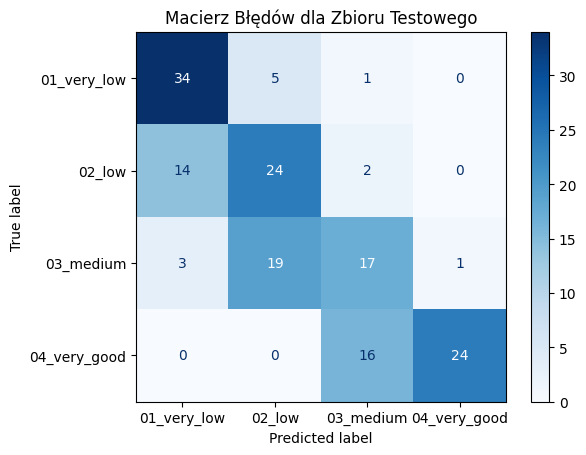

In [ ]:
# Macierz błędów
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices.keys())

disp.plot(cmap=plt.cm.Blues)
plt.title('Macierz Błędów dla Zbioru Testowego')
plt.show()

Found 1600 images belonging to 4 classes.
Found 320 images belonging to 4 classes.
Epoch 1/180
32/32 ━━━━━━━━━━━━━━━━━━━━ 23s 391ms/step - accuracy: 0.2667 - loss: 5.8459 - val_accuracy: 0.2500 - val_loss: 1.3851
Epoch 2/180
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 344ms/step - accuracy: 0.2553 - loss: 1.3849 - val_accuracy: 0.4469 - val_loss: 1.3150
Epoch 3/180
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 337ms/step - accuracy: 0.3165 - loss: 1.3632 - val_accuracy: 0.2500 - val_loss: 1.3781
Epoch 4/180
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 334ms/step - accuracy: 0.2975 - loss: 1.3688 - val_accuracy: 0.5188 - val_loss: 1.1329
Epoch 5/180
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 334ms/step - accuracy: 0.4781 - loss: 1.1172 - val_accuracy: 0.5844 - val_loss: 0.9281
Epoch 6/180
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 344ms/step - accuracy: 0.5458 - loss: 1.0108 - val_accuracy: 0.6094 - val_loss: 0.8959
Epoch 7/180
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 338ms/step - accuracy: 0.5878 - loss: 0.9205 - val_accuracy: 0.6438 - val_loss: 0.7826
Epoch 8

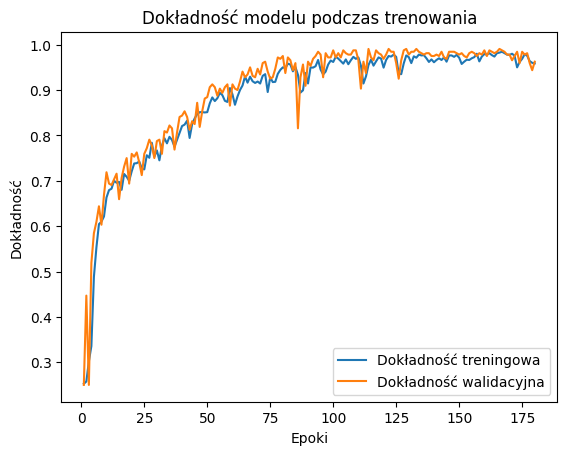

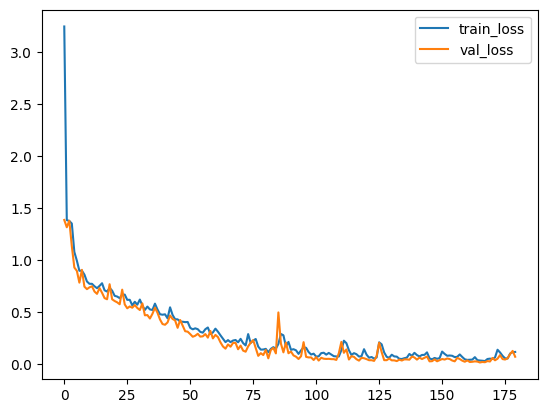

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#Połącz z dyskiem i wypakuj dane treningowe P3
drive.mount('/content/drive')
tar = tarfile.open("drive/MyDrive/oryginalki.tar.xz")
tar.extractall("trening")

drive.mount('/content/drive')
tar = tarfile.open("drive/MyDrive/test.tar.xz")
tar.extractall("valid")

# P3
HEIGHT = 224
WIDTH = 224
BATCH_SIZE = 64
num_classes = 4

train_dir = "/content/trening"
test_dir = "/content/valid"

# Przygotowanie danych treningowych i walidacyjnych
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(HEIGHT, WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(HEIGHT, WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False)

# Definicja modelu P3
input_tensor = Input(shape=(HEIGHT, WIDTH, 3))
base_model = VGG16(weights='imagenet', include_top=False, input_tensor=input_tensor)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)

output = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

#model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Trening P3
history = model.fit(
    train_generator,
    steps_per_epoch=32,
    validation_data=test_generator,
    validation_steps=32,
    epochs=180
)
# Wykresy P3
epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['accuracy'], label='Dokładność treningowa')
plt.plot(epochs, history.history['val_accuracy'], label='Dokładność walidacyjna')
plt.title('Dokładność modelu podczas trenowania')
plt.xlabel('Epoki')
plt.ylabel('Dokładność')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

# Zapisz model P3
model.save("p3.keras")
